Deoxyfluorination with Sulfonyl Fluorides Published in JACS https://doi.org/10.1021/jacs.8b01523

Yield Prediction using Random Forest & XGBoost (Using DFT calculated values)
                                                                                      Gashaw M. Goshu
                                                                                      June, 2020

In [21]:
# import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline
# the 23 descriptors, 740 rows and their values
data = pd.read_csv(r"C:\Users\Gashaw\Documents\R_input\descriptor_table.csv")
 

In [2]:
data

,alcohol_*C1_electrostatic_charge,alcohol_*C1_exposed_area,alcohol_electronegativity,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4-membered_ring,alcohol_5-membered_ring,alcohol_6-membered_ring,...,alcohol_homoallylic,alcohol_alpha-carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha amino,base_*N1_exposed_area,sulfonyl_fluoride_*S1_electrostatic_charge,sulfonyl_fluoride_*F1_electrostatic_charge,sulfonyl_fluoride_*O1_electrostatic_charge,yield
0,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.973,-0.210,-0.439,42
1,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.849,-0.198,-0.401,48
2,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.978,-0.208,-0.436,47
3,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.973,-0.204,-0.430,52
4,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.926,-0.162,-0.384,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.973,-0.210,-0.439,14
636,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.849,-0.198,-0.401,23
637,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.978,-0.208,-0.436,36
638,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.973,-0.204,-0.430,44


In [3]:
# Selected seven descriptors or features that were calculated using (Densitity Functional Theory) 
features = ['alcohol_*C1_exposed_area','alcohol_*C1_electrostatic_charge',
            'sulfonyl_fluoride_*F1_electrostatic_charge','base_*N1_exposed_area',
           'alcohol_electronegativity','sulfonyl_fluoride_*S1_electrostatic_charge',
            'sulfonyl_fluoride_*O1_electrostatic_charge']
X = data[features]
y = data['yield']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   alcohol_*C1_exposed_area                    640 non-null    float64
 1   alcohol_*C1_electrostatic_charge            640 non-null    float64
 2   sulfonyl_fluoride_*F1_electrostatic_charge  640 non-null    float64
 3   base_*N1_exposed_area                       640 non-null    float64
 4   alcohol_electronegativity                   640 non-null    float64
 5   sulfonyl_fluoride_*S1_electrostatic_charge  640 non-null    float64
 6   sulfonyl_fluoride_*O1_electrostatic_charge  640 non-null    float64
dtypes: float64(7)
memory usage: 35.1 KB


In [5]:
X

,alcohol_*C1_exposed_area,alcohol_*C1_electrostatic_charge,sulfonyl_fluoride_*F1_electrostatic_charge,base_*N1_exposed_area,alcohol_electronegativity,sulfonyl_fluoride_*S1_electrostatic_charge,sulfonyl_fluoride_*O1_electrostatic_charge
0,13.680,0.101,-0.210,7.397,0.12,0.973,-0.439
1,13.680,0.101,-0.198,7.397,0.12,0.849,-0.401
2,13.680,0.101,-0.208,7.397,0.12,0.978,-0.436
3,13.680,0.101,-0.204,7.397,0.12,0.973,-0.430
4,13.680,0.101,-0.162,7.397,0.12,0.926,-0.384
...,...,...,...,...,...,...,...
635,8.443,0.200,-0.210,5.305,0.10,0.973,-0.439
636,8.443,0.200,-0.198,5.305,0.10,0.849,-0.401
637,8.443,0.200,-0.208,5.305,0.10,0.978,-0.436
638,8.443,0.200,-0.204,5.305,0.10,0.973,-0.430


In [6]:
# Train-test split (hold 30% of data for model validation )

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)


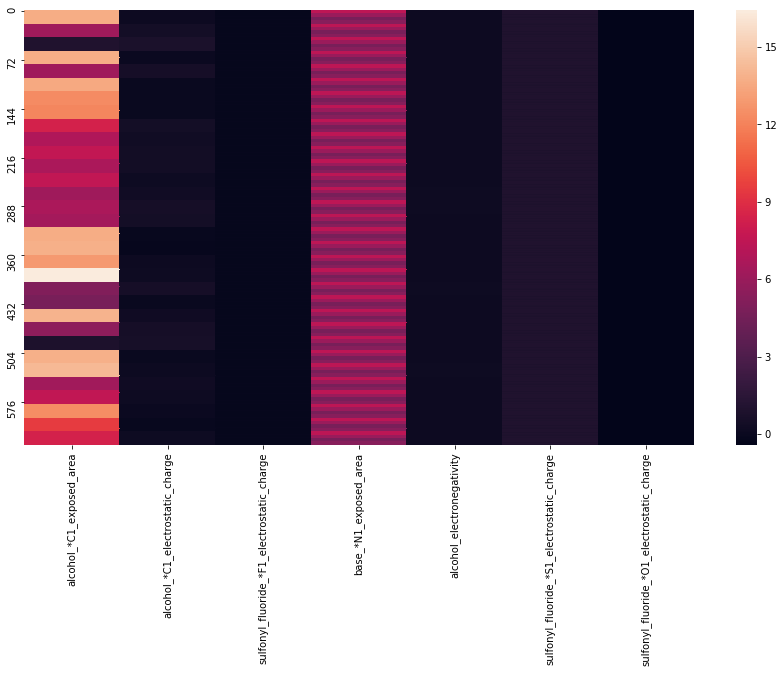

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X[features],yticklabels=72)

In [8]:
# Data preprocessing using pipeline 
pipe = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])


In [9]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [10]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 7.086250477744442


In [11]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9342577955168448


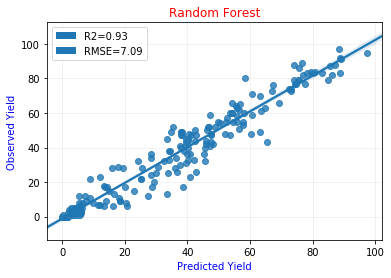

In [12]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [13]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.8159 ± 0.1140,alcohol_*C1_exposed_area
0.4003 ± 0.0607,alcohol_*C1_electrostatic_charge
0.2344 ± 0.0493,base_*N1_exposed_area
0.1807 ± 0.0269,alcohol_electronegativity
0.1125 ± 0.0336,sulfonyl_fluoride_*F1_electrostatic_charge
0.0946 ± 0.0237,sulfonyl_fluoride_*O1_electrostatic_charge
0.0144 ± 0.0131,sulfonyl_fluoride_*S1_electrostatic_charge


In [14]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)

In [15]:
# Data processing
pipe2 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb)])

In [16]:
pipe2.fit(X_train,y_train)
predicted_yield2 = pipe2.predict(X_valid)

In [17]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse2:', rmse2)

rmse2: 7.379867171092843


In [18]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.928696909408005


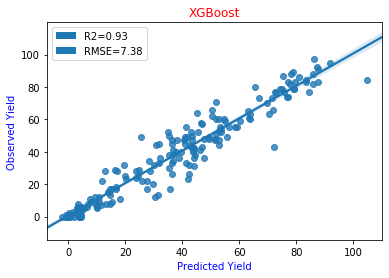

In [19]:
sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])

In [20]:
# Feature importance XGBoost
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe2, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.9500 ± 0.1550,alcohol_*C1_exposed_area
0.4936 ± 0.1299,alcohol_*C1_electrostatic_charge
0.3871 ± 0.1156,sulfonyl_fluoride_*F1_electrostatic_charge
0.2574 ± 0.0506,base_*N1_exposed_area
0.1565 ± 0.0306,alcohol_electronegativity
0.0264 ± 0.0308,sulfonyl_fluoride_*S1_electrostatic_charge
0 ± 0.0000,sulfonyl_fluoride_*O1_electrostatic_charge
